# 美しい地図を作りましょう

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/better maps.jpg">

matplotlib を使用してマップを作成する方法を学習しました。 このラボでは、マップ フィーチャの変更、ベースマップの追加、タイトルの作成などにより、これらのマップをさらに磨き上げる方法を学びます。

*注意

matplotlib には日本語フォント表示に関する問題があります。 Mac と PC のどちらを使用しているかに応じて、以下の適切なフォント ファミリを設定してください。

In [1]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


## Get data

まずはe-Statのサイトにアクセス。そこから次に手順でデータをダウンロードして今週のフォルダーに入れる：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 境界データ

➡️ 小地域

➡️ 国勢調査

➡️ 2020年

➡️ 小地域（基本単位区）（JGD2000）

➡️ 世界測地系緯度経度・Shapefile

➡️ 12 千葉県

➡️ 12217 柏市

In [2]:
gdf = gpd.read_file('B002005212020DDSWC12217.zip')

In [3]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   6178 non-null   object  
 1   PREF       6178 non-null   object  
 2   CITY       6178 non-null   object  
 3   K_AREA     6178 non-null   object  
 4   S_AREA     6178 non-null   object  
 5   PREF_NAME  6178 non-null   object  
 6   CITY_NAME  6178 non-null   object  
 7   S_NAME     6178 non-null   object  
 8   KIGO_E     2 non-null      object  
 9   HCODE      6178 non-null   int64   
 10  AREA       6178 non-null   float64 
 11  PERIMETER  6178 non-null   float64 
 12  KIHON1     6178 non-null   object  
 13  DUMMY1     6178 non-null   object  
 14  KIHON2     6178 non-null   object  
 15  KIHON3     6178 non-null   object  
 16  C1         6178 non-null   int64   
 17  C2         6178 non-null   int64   
 18  DUMMY2     6178 non-null   object  
 19  C3         6178 non

In [4]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,122170001101,12,217,018005060,0001101,千葉県,柏市,柏五丁目,NaN,8101,...,2170001-1-01,29,14,12,217,139.975581,35.865574,0180-05060,1-1- 1,"POLYGON ((139.97627 35.86568, 139.97647 35.865..."
1,122170001102,12,217,018005070,0001102,千葉県,柏市,柏五丁目,NaN,8101,...,2170001-1-02,56,37,12,217,139.975826,35.866425,0180-05070,1-1- 2,"POLYGON ((139.97627 35.86568, 139.97603 35.865..."
2,122170001103,12,217,018005090,0001103,千葉県,柏市,柏五丁目,NaN,8101,...,2170001-1-03,0,0,12,217,139.974888,35.866766,0180-05090,1-1- 3,"POLYGON ((139.97576 35.86743, 139.97553 35.867..."
3,122170001104,12,217,018005100,0001104,千葉県,柏市,柏五丁目,NaN,8101,...,2170001-1-04,0,0,12,217,139.976011,35.868092,0180-05100,1-1- 4,"POLYGON ((139.97692 35.86849, 139.97680 35.868..."
4,122170001105,12,217,018005110,0001105,千葉県,柏市,柏五丁目,NaN,8101,...,2170001-1-05,15,15,12,217,139.977300,35.867969,0180-05110,1-1- 5,"POLYGON ((139.97785 35.86753, 139.97779 35.867..."


このデータを「丁目」でまとめたいのでテーブルの中の丁目を示す「S_NAME」でグループ化してsumします。

In [5]:
# dissolve by S_NAME and sum fields 
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


ではとりあえずシンプルにマップを`fig,ax`という変数を使って作ろう。このアプローチはmatplotlibでよく使われ、複数のマップを同時に作りたい時に後々役に立ちます。今のうちに覚えておくと良い！

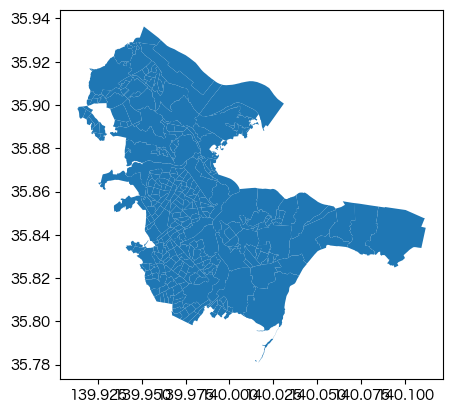

In [6]:
fig,ax = plt.subplots()
gdf.plot(ax=ax);

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/29/268437330/268434974.jpg

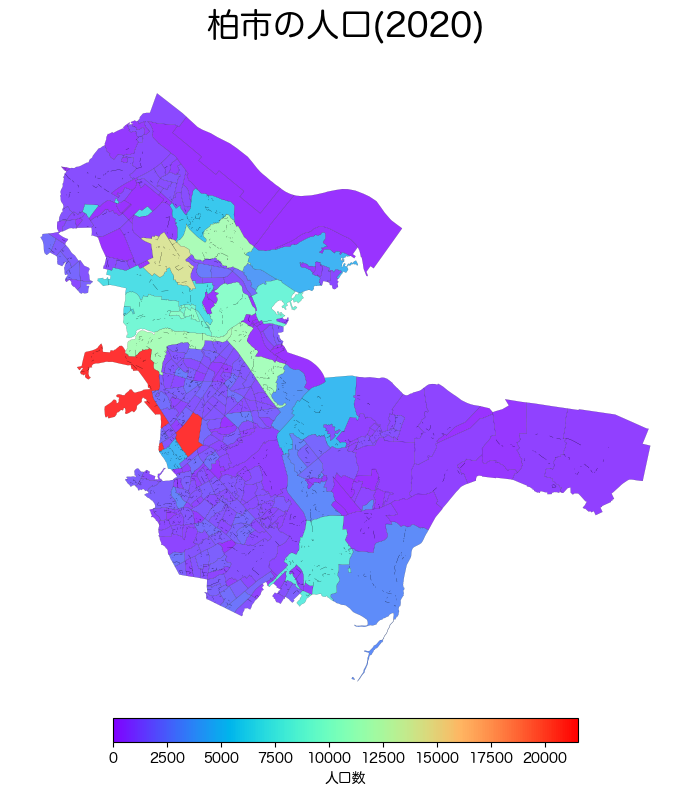

In [7]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='rainbow',  # Change the colormap to 'rainbow'
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


<AxesSubplot: xlabel='S_NAME'>

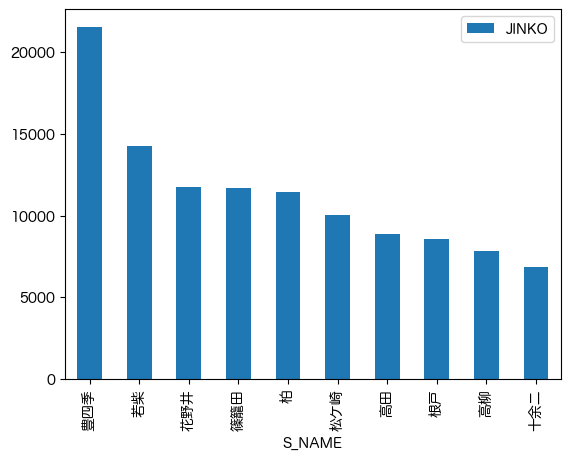

In [8]:
gdf_sorted = gdf.sort_values('JINKO', ascending=False)
gdf_sorted.head(10).plot(x='S_NAME', y='JINKO', kind='bar')


データには既に「JINKO」のカラムがあるので、これを使ってコロプレス（choropleth）マップを作ろう。
- `column='JINKO'`
- `legend=True`

In [ ]:
# sort data by JINKO
gdf = gdf.sort_values(by='JINKO',ascending=False)
gdf

In [ ]:
# population map
fig,ax = plt.subplots()
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Size

マップのサイズを変更
- `figsize=(10,10)`

2 つの数字はマップの幅と高さを示しますが、マップされるデータの形状に応じてサイズが変化する可能性があります。

In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_002.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_003.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_004.webp">

In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='gray_r');

## Lines

次の引数を使用して、ポリゴンの境界線の幅と色を変更できます。

- `edgecolor='black'`
- `linewidth=0.1`

In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.2);

## Hide Axes

軸を非表示にするには、コード内に新しい行を作成し、`ax` 変数にアクセスする必要があります。

- `ax.axis('off')`


In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1);

# hide axes
ax.axis('off');

## Legend options

凡例、デカくない？ラベルは？下にできない？と思ったら、オプションを足してみよう！

- `legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}`


In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off');

## Title

マップのタイトルを設定するには、`ax` 変数を参照する別のコード行を追加する必要があります。

なお、日本語フォントの設定する必要があるのでMACかPCによって違うので注意：

Windows PC:
- `ax.set_title('柏市の人口',fontsize=24, fontname='MS Gothic');`

Mac:
- `ax.set_title('柏市の人口',fontsize=24, fontname='Hiragino Maru Gothic Pro');`

In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20);




## Basemap

ベースマップを足すには複数のステップが必要となる。

まずはベースマップを提供しているモジュール【contextily】をimportする。

In [ ]:
import contextily as cx

次はデータをcontextilyがサポートしている地図投影法に変換する必要がある。

え？地図投影法とは？

## Projections

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/projections.png">

https://www.esrij.com/gis-guide/coordinate-and-spatial/coordinate-system/


https://ja.wikipedia.org/wiki/%E5%9C%B0%E5%9B%B3%E6%8A%95%E5%BD%B1%E6%B3%95%E3%81%AE%E4%B8%80%E8%A6%A7

緯度経度 (latitude,longitude) で表されているデータの地理座標系のcrs番号は `4326`だがcontextilyのベースマップは【Web メルカトル】という投影座標系を使っていて、その crs番号は `3857` である。

In [ ]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

## Basemap options

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/basemaps.jpg">

- source='https://cyberjapandata.gsi.go.jp/xyz/std/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg'
- source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png'


In [ ]:
# population map
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');

## Transparency

コロプレス レイヤーに少し透明度を追加して、ベースマップ上にシームレスに「浮かせる」ことができます。

- `alpha=0.8`

In [ ]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg', alpha=0.5);


## Labels

ちょっと高度なテクニックだが、以下のようにトップ１０人口が高い場所のラベルをつける。

In [ ]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('JINKO', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(20)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


# Exercise

「SETAI」を示す地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。

In [ ]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='SETAI',
         legend=True,
         cmap='Blues',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "世帯数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('SETAI', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(20)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('柏市の世帯数(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


In [ ]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='AREA',
         legend=True,
         cmap='Greens',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "AREA",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('AREA', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(20)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('柏市の面積(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first map on the left subplot
gdf.plot(ax=axs[0],
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[0].axis('off')
axs[0].set_title('柏市の人口(2020)', fontsize=12)

# Plot the second map on the right subplot
gdf.plot(ax=axs[1],
         column='SETAI',
         legend=True,
         cmap='Blues',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "世帯数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[1].axis('off')
axs[1].set_title('柏市の世帯数(2020)', fontsize=12)

# Add the basemap to both subplots
ctx.add_basemap(axs[0], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg', alpha=0.5)
ctx.add_basemap(axs[1], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg', alpha=0.5)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Plot the first map on the left subplot
gdf.plot(ax=axs[0],
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[0].axis('off')
axs[0].set_title('柏市の人口(2020)', fontsize=12)

# Plot the second map on the right subplot as an area map
gdf.plot(ax=axs[1],
         column='AREA',
         legend=True,
         cmap='Greens',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "面積",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[1].axis('off')
axs[1].set_title('柏市の面積(2020)', fontsize=12)

# Add the basemap to both subplots
ctx.add_basemap(axs[0], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg', alpha=0.5)
ctx.add_basemap(axs[1], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg', alpha=0.5)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
